# Imports

In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np

from sklearn import svm, tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')

import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
data = pd.read_csv("SkillCraft.csv")

In [3]:
data.drop(columns = 'GameID', inplace = True)

In [4]:
y = data['LeagueIndex']
X = data.drop(columns = 'LeagueIndex')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 42)

In [6]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), 
                              columns = X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), 
                              columns = X.columns, index = X_test.index)

In [7]:
y_train = keras.utils.to_categorical(y_train, 8)
y_test = keras.utils.to_categorical(y_test, 8)

In [8]:
X_train_scaled.head()

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,0.072284,-0.803127,-0.016021,-1.318972,-0.597681,-0.107522,0.705077,0.709327,-0.508293,-0.518530,0.780383,1.146459,-1.471608,-0.682378,-0.811311,-0.288292,-0.533826,-0.549380
1,1.005188,-0.304914,-0.027622,-0.634379,-0.487117,0.562755,-0.565802,-0.576186,1.169240,-0.107258,0.446273,0.050650,-0.645243,-1.214921,-0.373558,-1.368403,-0.533826,-0.549380
2,-0.860620,1.023655,-0.013121,-0.284760,-0.124498,1.111023,0.281450,-0.121246,-0.559717,-0.332267,-0.736466,-0.450454,-0.163240,-1.348057,0.059796,-0.288292,-0.533826,0.129219
3,1.471640,0.359371,-0.013121,1.006636,-0.198806,2.036444,1.128703,3.517604,-0.096717,-1.975969,-0.334124,1.302528,8.567335,-1.747464,-0.256817,-1.368403,-0.533826,-0.549380
4,-1.093846,-0.138843,-0.020371,-1.177554,-0.762346,-1.001491,-0.565802,-0.576186,-0.030296,0.053997,1.532397,0.038622,-1.444994,0.382708,-1.176449,0.251764,-0.533826,-0.139707


In [9]:
model_1 = Sequential()
model_1.add(Dense(64, activation='tanh', input_shape=(18,)))
model_1.add(Dense(8, activation='softmax'))

In [10]:
model_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
results_1 = model_1.fit(X_train_scaled, y_train, epochs=50, batch_size=500, validation_data=(X_test_scaled, y_test))

Train on 2336 samples, validate on 1002 samples
Epoch 1/50
2336/2336 [==============================] - 0s 57us/step - loss: 2.1558 - acc: 0.1353 - val_loss: 2.1389 - val_acc: 0.1437
Epoch 2/50
2336/2336 [==============================] - 0s 8us/step - loss: 2.1229 - acc: 0.1503 - val_loss: 2.1082 - val_acc: 0.1567
Epoch 3/50
2336/2336 [==============================] - 0s 6us/step - loss: 2.0920 - acc: 0.1618 - val_loss: 2.0795 - val_acc: 0.1637
Epoch 4/50
2336/2336 [==============================] - 0s 6us/step - loss: 2.0632 - acc: 0.1712 - val_loss: 2.0525 - val_acc: 0.1737
Epoch 5/50
2336/2336 [==============================] - 0s 8us/step - loss: 2.0360 - acc: 0.1798 - val_loss: 2.0271 - val_acc: 0.1896
Epoch 6/50
2336/2336 [==============================] - 0s 8us/step - loss: 2.0106 - acc: 0.1926 - val_loss: 2.0032 - val_acc: 0.2066
Epoch 7/50
2336/2336 [==============================] - 0s 7us/step - loss: 1.9867 - acc: 0.2021 - val_loss: 1.9807 - val_acc: 0.2126
Epoch 8/50
23

In [12]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

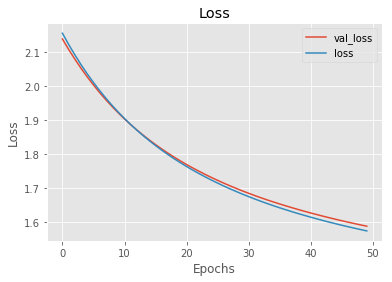

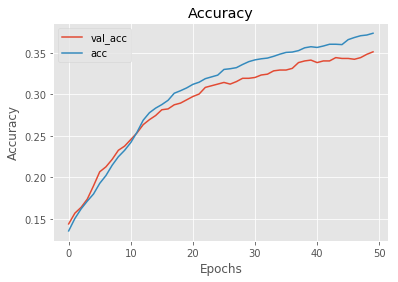

In [13]:
visualize_training_results(results_1)

In [14]:
model_2 = Sequential()
model_2.add(Dense(64, activation='tanh', input_shape=(18,)))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(8, activation='softmax'))

In [15]:
model_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [16]:
results_2 = model_2.fit(X_train_scaled, y_train, epochs=200, batch_size=50, validation_data=(X_test_scaled, y_test))

Train on 2336 samples, validate on 1002 samples
Epoch 1/200
2336/2336 [==============================] - 0s 102us/step - loss: 2.1108 - acc: 0.1571 - val_loss: 1.9799 - val_acc: 0.2275
Epoch 2/200
2336/2336 [==============================] - 0s 30us/step - loss: 1.9169 - acc: 0.2513 - val_loss: 1.8267 - val_acc: 0.3104
Epoch 3/200
2336/2336 [==============================] - 0s 29us/step - loss: 1.7887 - acc: 0.3014 - val_loss: 1.7234 - val_acc: 0.3413
Epoch 4/200
2336/2336 [==============================] - 0s 32us/step - loss: 1.7002 - acc: 0.3279 - val_loss: 1.6514 - val_acc: 0.3583
Epoch 5/200
2336/2336 [==============================] - 0s 33us/step - loss: 1.6359 - acc: 0.3506 - val_loss: 1.5983 - val_acc: 0.3723
Epoch 6/200
2336/2336 [==============================] - 0s 29us/step - loss: 1.5878 - acc: 0.3652 - val_loss: 1.5589 - val_acc: 0.3752
Epoch 7/200
2336/2336 [==============================] - 0s 29us/step - loss: 1.5502 - acc: 0.3741 - val_loss: 1.5278 - val_acc: 0.3802

2336/2336 [==============================] - 0s 28us/step - loss: 1.3137 - acc: 0.4388 - val_loss: 1.3500 - val_acc: 0.4052
Epoch 61/200
2336/2336 [==============================] - 0s 31us/step - loss: 1.3129 - acc: 0.4435 - val_loss: 1.3505 - val_acc: 0.4042
Epoch 62/200
2336/2336 [==============================] - 0s 29us/step - loss: 1.3119 - acc: 0.4461 - val_loss: 1.3507 - val_acc: 0.4072
Epoch 63/200
2336/2336 [==============================] - 0s 27us/step - loss: 1.3113 - acc: 0.4435 - val_loss: 1.3501 - val_acc: 0.4072
Epoch 64/200
2336/2336 [==============================] - 0s 32us/step - loss: 1.3105 - acc: 0.4405 - val_loss: 1.3490 - val_acc: 0.4062
Epoch 65/200
2336/2336 [==============================] - 0s 28us/step - loss: 1.3096 - acc: 0.4486 - val_loss: 1.3494 - val_acc: 0.4072
Epoch 66/200
2336/2336 [==============================] - 0s 41us/step - loss: 1.3090 - acc: 0.4448 - val_loss: 1.3487 - val_acc: 0.4062
Epoch 67/200
2336/2336 [==============================

Epoch 120/200
2336/2336 [==============================] - 0s 27us/step - loss: 1.2754 - acc: 0.4563 - val_loss: 1.3382 - val_acc: 0.4012
Epoch 121/200
2336/2336 [==============================] - 0s 25us/step - loss: 1.2750 - acc: 0.4589 - val_loss: 1.3371 - val_acc: 0.4042
Epoch 122/200
2336/2336 [==============================] - 0s 25us/step - loss: 1.2744 - acc: 0.4580 - val_loss: 1.3368 - val_acc: 0.4072
Epoch 123/200
2336/2336 [==============================] - 0s 42us/step - loss: 1.2735 - acc: 0.4585 - val_loss: 1.3378 - val_acc: 0.4012
Epoch 124/200
2336/2336 [==============================] - 0s 26us/step - loss: 1.2732 - acc: 0.4598 - val_loss: 1.3382 - val_acc: 0.4022
Epoch 125/200
2336/2336 [==============================] - 0s 30us/step - loss: 1.2725 - acc: 0.4623 - val_loss: 1.3382 - val_acc: 0.4002
Epoch 126/200
2336/2336 [==============================] - 0s 32us/step - loss: 1.2718 - acc: 0.4606 - val_loss: 1.3383 - val_acc: 0.4052
Epoch 127/200
2336/2336 [=========

2336/2336 [==============================] - 0s 34us/step - loss: 1.2420 - acc: 0.4739 - val_loss: 1.3357 - val_acc: 0.3972
Epoch 180/200
2336/2336 [==============================] - 0s 28us/step - loss: 1.2408 - acc: 0.4756 - val_loss: 1.3351 - val_acc: 0.3932
Epoch 181/200
2336/2336 [==============================] - 0s 29us/step - loss: 1.2408 - acc: 0.4743 - val_loss: 1.3369 - val_acc: 0.4022
Epoch 182/200
2336/2336 [==============================] - 0s 28us/step - loss: 1.2401 - acc: 0.4765 - val_loss: 1.3374 - val_acc: 0.4042
Epoch 183/200
2336/2336 [==============================] - 0s 29us/step - loss: 1.2394 - acc: 0.4773 - val_loss: 1.3379 - val_acc: 0.4012
Epoch 184/200
2336/2336 [==============================] - 0s 32us/step - loss: 1.2390 - acc: 0.4769 - val_loss: 1.3384 - val_acc: 0.4032
Epoch 185/200
2336/2336 [==============================] - 0s 28us/step - loss: 1.2382 - acc: 0.4799 - val_loss: 1.3360 - val_acc: 0.3992
Epoch 186/200
2336/2336 [=======================

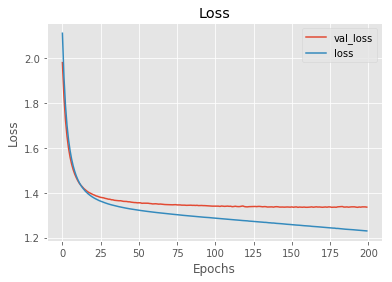

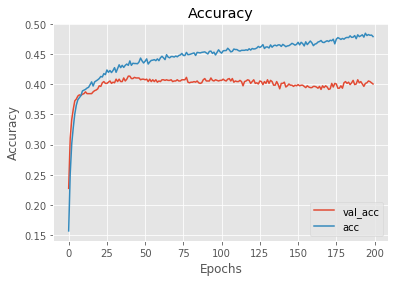

In [17]:
visualize_training_results(results_2)

In [18]:
y_group = y.map(lambda x: 0 if x in [1, 2, 3] else 
                1 if x in [4, 5] else 2)

In [19]:
X_train, X_test, y_group_train, y_group_test = train_test_split(
    X, y_group, test_size = 0.30, random_state = 42)

In [20]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), 
                              columns = X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), 
                              columns = X.columns, index = X_test.index)

In [21]:
y_train = keras.utils.to_categorical(y_group_train, 3)
y_test = keras.utils.to_categorical(y_group_test, 3)

In [22]:
model_3 = Sequential()
model_3.add(Dense(64, activation='relu', input_shape=(18,)))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(3, activation='softmax'))

In [23]:
model_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [24]:
results_3 = model_3.fit(X_train_scaled, y_train, epochs=200, batch_size=50, validation_data=(X_test_scaled, y_test))

Train on 2336 samples, validate on 1002 samples
Epoch 1/200
2336/2336 [==============================] - 0s 122us/step - loss: 1.0674 - acc: 0.4842 - val_loss: 1.0399 - val_acc: 0.5000
Epoch 2/200
2336/2336 [==============================] - 0s 25us/step - loss: 0.9501 - acc: 0.5604 - val_loss: 0.9590 - val_acc: 0.5499
Epoch 3/200
2336/2336 [==============================] - 0s 34us/step - loss: 0.8837 - acc: 0.6015 - val_loss: 0.9114 - val_acc: 0.5719
Epoch 4/200
2336/2336 [==============================] - 0s 28us/step - loss: 0.8404 - acc: 0.6224 - val_loss: 0.8755 - val_acc: 0.5898
Epoch 5/200
2336/2336 [==============================] - 0s 31us/step - loss: 0.8101 - acc: 0.6340 - val_loss: 0.8507 - val_acc: 0.6008
Epoch 6/200
2336/2336 [==============================] - 0s 36us/step - loss: 0.7884 - acc: 0.6370 - val_loss: 0.8325 - val_acc: 0.6058
Epoch 7/200
2336/2336 [==============================] - 0s 25us/step - loss: 0.7725 - acc: 0.6421 - val_loss: 0.8186 - val_acc: 0.6118

2336/2336 [==============================] - 0s 27us/step - loss: 0.6610 - acc: 0.7063 - val_loss: 0.7436 - val_acc: 0.6427
Epoch 61/200
2336/2336 [==============================] - 0s 33us/step - loss: 0.6604 - acc: 0.7012 - val_loss: 0.7417 - val_acc: 0.6457
Epoch 62/200
2336/2336 [==============================] - 0s 34us/step - loss: 0.6596 - acc: 0.7029 - val_loss: 0.7394 - val_acc: 0.6487
Epoch 63/200
2336/2336 [==============================] - 0s 33us/step - loss: 0.6588 - acc: 0.7063 - val_loss: 0.7396 - val_acc: 0.6487
Epoch 64/200
2336/2336 [==============================] - 0s 30us/step - loss: 0.6580 - acc: 0.7063 - val_loss: 0.7397 - val_acc: 0.6447
Epoch 65/200
2336/2336 [==============================] - 0s 26us/step - loss: 0.6572 - acc: 0.7051 - val_loss: 0.7384 - val_acc: 0.6477
Epoch 66/200
2336/2336 [==============================] - 0s 26us/step - loss: 0.6565 - acc: 0.7072 - val_loss: 0.7387 - val_acc: 0.6467
Epoch 67/200
2336/2336 [==============================

Epoch 120/200
2336/2336 [==============================] - 0s 30us/step - loss: 0.6201 - acc: 0.7226 - val_loss: 0.7393 - val_acc: 0.6477
Epoch 121/200
2336/2336 [==============================] - 0s 28us/step - loss: 0.6195 - acc: 0.7243 - val_loss: 0.7409 - val_acc: 0.6457
Epoch 122/200
2336/2336 [==============================] - 0s 25us/step - loss: 0.6193 - acc: 0.7247 - val_loss: 0.7418 - val_acc: 0.6467
Epoch 123/200
2336/2336 [==============================] - 0s 30us/step - loss: 0.6186 - acc: 0.7230 - val_loss: 0.7405 - val_acc: 0.6457
Epoch 124/200
2336/2336 [==============================] - 0s 31us/step - loss: 0.6176 - acc: 0.7239 - val_loss: 0.7401 - val_acc: 0.6437
Epoch 125/200
2336/2336 [==============================] - 0s 27us/step - loss: 0.6169 - acc: 0.7235 - val_loss: 0.7420 - val_acc: 0.6487
Epoch 126/200
2336/2336 [==============================] - 0s 27us/step - loss: 0.6166 - acc: 0.7243 - val_loss: 0.7392 - val_acc: 0.6467
Epoch 127/200
2336/2336 [=========

2336/2336 [==============================] - 0s 25us/step - loss: 0.5850 - acc: 0.7419 - val_loss: 0.7481 - val_acc: 0.6547
Epoch 180/200
2336/2336 [==============================] - 0s 25us/step - loss: 0.5851 - acc: 0.7384 - val_loss: 0.7496 - val_acc: 0.6507
Epoch 181/200
2336/2336 [==============================] - 0s 25us/step - loss: 0.5848 - acc: 0.7363 - val_loss: 0.7502 - val_acc: 0.6457
Epoch 182/200
2336/2336 [==============================] - 0s 26us/step - loss: 0.5839 - acc: 0.7402 - val_loss: 0.7485 - val_acc: 0.6467
Epoch 183/200
2336/2336 [==============================] - 0s 25us/step - loss: 0.5832 - acc: 0.7384 - val_loss: 0.7464 - val_acc: 0.6557
Epoch 184/200
2336/2336 [==============================] - 0s 27us/step - loss: 0.5830 - acc: 0.7419 - val_loss: 0.7490 - val_acc: 0.6497
Epoch 185/200
2336/2336 [==============================] - 0s 30us/step - loss: 0.5823 - acc: 0.7449 - val_loss: 0.7486 - val_acc: 0.6497
Epoch 186/200
2336/2336 [=======================

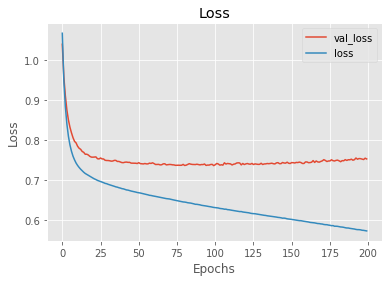

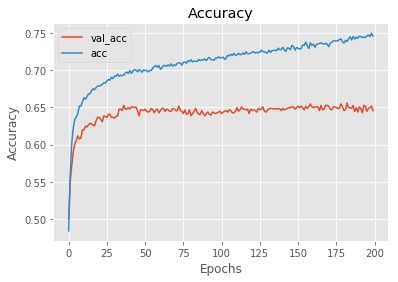

In [25]:
visualize_training_results(results_3)